![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [119]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
# Loading and examining the dataset
penguins_df = pd.read_csv("./Dataset/penguins.csv")
penguins_df['sex'] = LabelEncoder().fit_transform(penguins_df['sex'])

penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


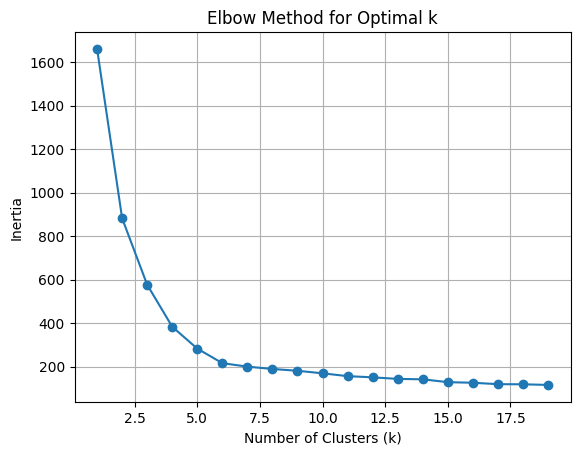

In [120]:
inertias = []
ks = range(1, 20)

samples = penguins_df.to_numpy()

for k in range(1, 20):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    pipeline = make_pipeline(scaler, model)
    
    # Fit model to samples
    pipeline.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [121]:
model = KMeans(n_clusters = 7)
pipeline = make_pipeline(scaler, model)

pipeline.fit(samples)

penguins_df["cluster"] = model.labels_
centroids = model.cluster_centers_

stat_penguins = penguins_df.groupby("cluster").mean(numeric_only=True).reset_index().drop(['cluster', 'sex'], axis=1)


stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,49.473770,15.718033,221.540984,5484.836066
1,40.315714,19.011429,192.242857,4034.642857
2,46.962069,14.524138,213.620690,4852.586207
3,37.374667,17.604000,187.693333,3369.666667
4,50.805556,19.305556,199.666667,3952.083333
5,44.165517,13.951724,211.793103,4506.896552
6,46.881250,17.628125,192.218750,3535.156250


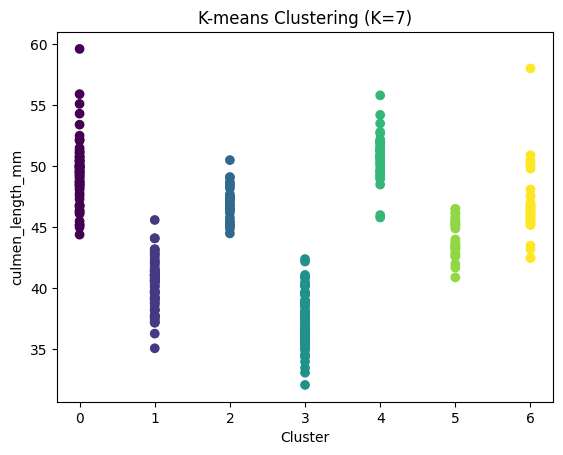

In [122]:
# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['cluster'], penguins_df['culmen_length_mm'], c=model.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['cluster'].min()), int(penguins_df['cluster'].max()) + 1))
plt.title(f'K-means Clustering (K={7})')
plt.show()